In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
from tqdm import tqdm
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path
import soundfile as sf  # Para guardar en formato WAV


In [3]:
def extraer_caracteristicas_1(ruta_completa,clase):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    # Calcular las derivadas primera y segunda (delta y delta-delta)
    delta_mfcc = librosa.feature.delta(mfccs)
    delta_delta_mfcc = librosa.feature.delta(mfccs, order=2)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])
    clase=clase



    # Crear una fila con todos los datos
    caracteristicas = [
        ruta_completa,
        mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,
        clase
    ]
    return caracteristicas


In [4]:
# funcion extractor de caracteristicas datos nuevos
def extraer_caracteristicas_nuevos(ruta_completa):
    y, sr = librosa.load(ruta_completa)

    # Extracción de características
    mean = np.mean(y)
    std = np.std(y)

    #Calcular los Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    #Obtener el promedio de los coeficientes MFCC
    mean_mfccs = np.mean(mfccs, axis=1)

    #Características en el dominio del tiempo
    max_amplitude = np.max(np.abs(y))
    min_amplitude = np.min(np.abs(y))

    #Características en el dominio de la frecuencia
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0])
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)[0])

    #Características de energía
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y)[0])
    rms = np.mean(librosa.feature.rms(y=y)[0])




    # Crear una fila con todos los datos
    caracteristicas = [mean,
        std,
        *mean_mfccs,#Desempaqueta
        max_amplitude,
        min_amplitude,
        spectral_centroid,
        spectral_bandwidth,
        spectral_rolloff,
        zero_crossing_rate,
        rms,

    ]
    return caracteristicas

In [5]:
data = []

In [6]:
# Lista para almacenar las filas del dataset hombre y mujeres enfermos
#data = []
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM/export"
clase="sick"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

       # nombres_columnas = [
       # 'Ruta',
       # 'Media señal',
       # 'Desviación estándar de la señal',
       # 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
       # 'Amplitud máxima',
       # 'Amplitud mínima',
       # 'Promedio del centroides espectrales',
       # 'Promedio del ancho de banda espectral',
       # 'Promedio del rolloff espectral',
       # 'Promedio de la tasa de cruce por cero',
       # 'RMS (Root Mean Square)',
       # 'Clase'
   ## ]

#df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


100%|██████████| 862/862 [01:25<00:00, 10.11it/s]


In [7]:
# Lista para almacenar las filas del dataset hombre y mujeres sanas
#data = []
directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos"
clase="sano"
# Cargar el archivo CSV con los nombres de los archivos y las clases
#metadata = pd.read_csv(ruta_metadata)

# Iterar sobre los archivos de audio en el directorio
for archivo_audio in tqdm(os.listdir(directorio_audio)):
        if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
            ruta_completa = os.path.join(directorio_audio, archivo_audio)
            # Extraer características 1
            fila = extraer_caracteristicas_1(ruta_completa,clase)

            # Agregar la fila a la lista de datos
            data.append(fila)

100%|██████████| 1656/1656 [02:06<00:00, 13.10it/s]


In [8]:
# funcion para nuevos datos

def nuevos_datos(directorio_audio):

    datos_nuevos = []
    clase="desconocido"


# Iterar sobre los archivos de audio en el directorio
    for archivo_audio in tqdm(os.listdir(directorio_audio)):
            if archivo_audio.endswith('.wav'):  # Asegurarse de que estás trabajando con archivos de audio
                ruta_completa = os.path.join(directorio_audio, archivo_audio)
                # Extraer características 1
                fila = extraer_caracteristicas_nuevos(ruta_completa)

                # Agregar la fila a la lista de datos
                datos_nuevos.append(fila)
                df_nuevos = pd.DataFrame(datos_nuevos)

    return df_nuevos




In [9]:
nombres_columnas = [
        'Ruta',
        'Media señal',
        'Dstandar',#Desviación estándar de la señal
        'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
        'Amáxima',#Amplitud maxima
        'Amín',#Amplitud mínima
        'AvgCS', # Promedio del centroides espectrales
        'AvgBws',#Promedio del ancho de banda espectral
        'Avgrolloff',#Promedio del rolloff espectral
        'AvgCrossZ',#Promedio de la tasa de cruce por cero
        'RMS ',#RMS (Root Mean Square)
        'Clase'
    ]

df = pd.DataFrame(data, columns=nombres_columnas)

    # Guardar el DataFrame como un archivo CSV
#df.to_csv('dataset_test_1.csv', index=False)


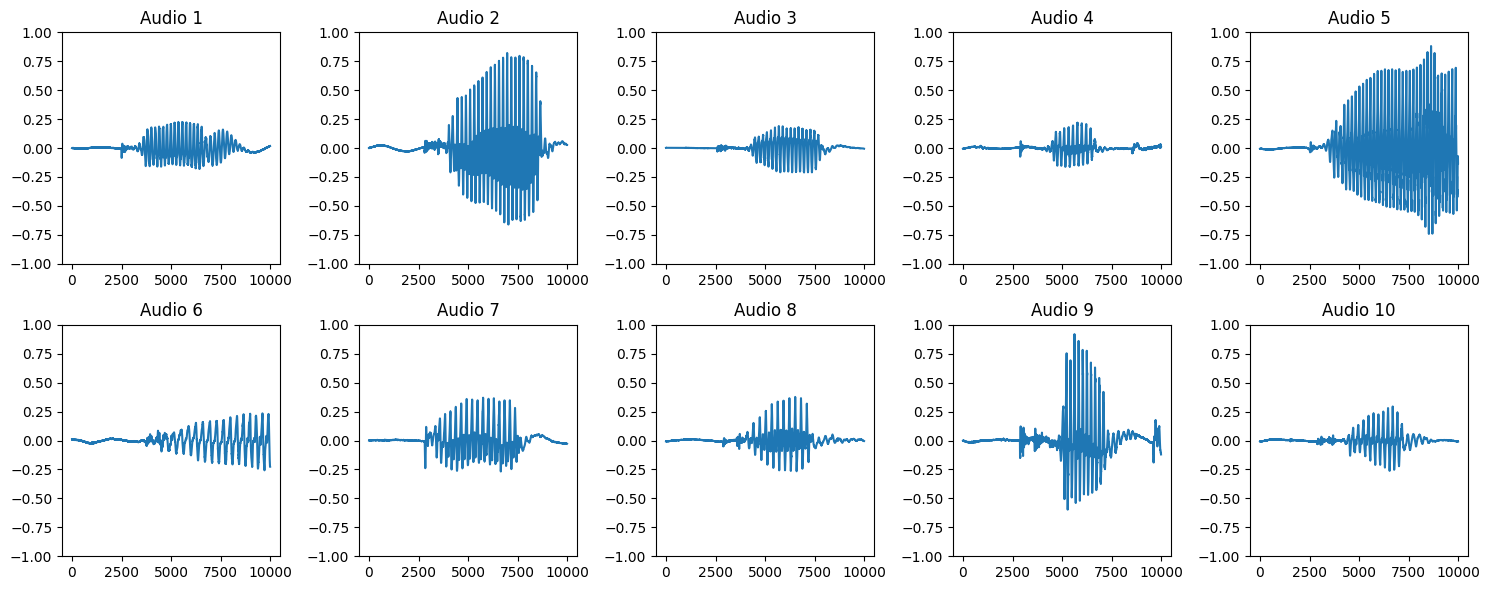

In [10]:
#grafica audios personas enfermas

# Ruta de la carpeta con los archivos WAV
folder_path = '/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM/export'

# Lista para almacenar los audios
enfermos_signals = []

# Iterar sobre los archivos WAV en la carpeta
for p in Path(folder_path).glob('*.wav'):
    audio, sr = librosa.load(p, sr=None)
    enfermos_signals.append(audio)
    # Guardar el audio en formato WAV
    sf.write(f'audio_{len(enfermos_signals)}.wav', audio, sr)

    # Mostrar solo los primeros 10
    if len(enfermos_signals) == 10:
        break

# Mostrar los primeros 10 audios
plt.figure(figsize=(15, 6))
for i, x in enumerate(enfermos_signals):
    plt.subplot(2, 5, i+1)
    plt.plot(x[:10000])
    plt.ylim(-1, 1)
    plt.title(f'Audio {i+1}')
    plt.tight_layout()

plt.show()

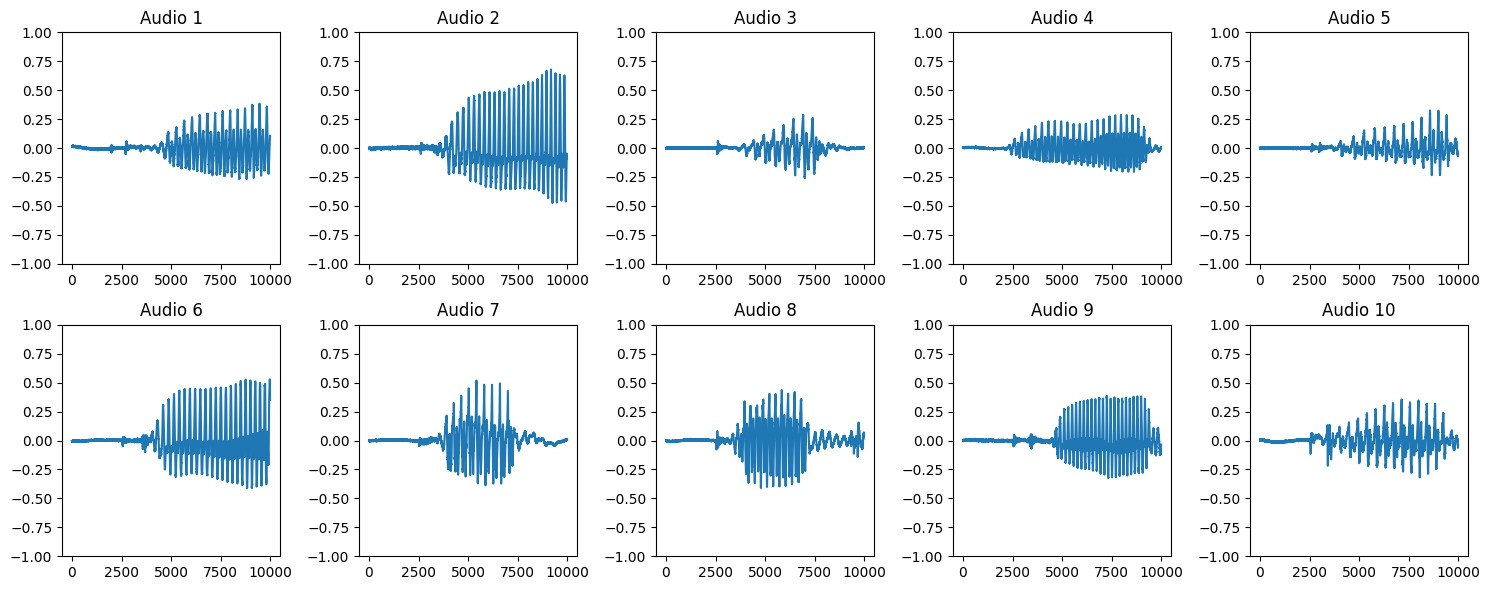

In [11]:
#audios personas sanas

# Ruta de la carpeta con los archivos WAV
folder_sanos = '/content/drive/MyDrive/PROYECTO_FINAL/frases sanos + whitenoise sanos'

# Lista para almacenar los audios
sanos_signals = []

# Iterar sobre los archivos WAV en la carpeta
for p in Path(folder_sanos).glob('*.wav'):
    audio, sr = librosa.load(p, sr=None)
    sanos_signals.append(audio)
    # Guardar el audio en formato WAV
    sf.write(f'audio_{len(sanos_signals)}.wav', audio, sr)

    # Mostrar solo los primeros 10
    if len(sanos_signals) == 10:
        break

# Mostrar los primeros 10 audios
plt.figure(figsize=(15, 6))
for i, x in enumerate(sanos_signals):
    plt.subplot(2, 5, i+1)
    plt.plot(x[:10000])
    plt.ylim(-1, 1)
    plt.title(f'Audio {i+1}')
    plt.tight_layout()

plt.show()

In [12]:
print(df)

                                                   Ruta  Media señal  \
0     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000507   
1     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...    -0.000026   
2     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000154   
3     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...    -0.000111   
4     /content/drive/MyDrive/PROYECTO_FINAL/Frases_e...     0.000614   
...                                                 ...          ...   
2513  /content/drive/MyDrive/PROYECTO_FINAL/frases s...    -0.000159   
2514  /content/drive/MyDrive/PROYECTO_FINAL/frases s...     0.000322   
2515  /content/drive/MyDrive/PROYECTO_FINAL/frases s...    -0.000115   
2516  /content/drive/MyDrive/PROYECTO_FINAL/frases s...    -0.000099   
2517  /content/drive/MyDrive/PROYECTO_FINAL/frases s...    -0.000151   

      Dstandar      MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0     0.113010 -335.460968   90.559555  30.698204  34.027252

In [13]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/PATH/Hombre_frases_path"
###clase="sick"
#recorrer_archivos_audio(directorio_audio,clase)


In [14]:
print(df.describe())

       Media señal     Dstandar       MFCC_1       MFCC_2       MFCC_3  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     -0.004669     0.119553  -267.255646    97.136818    24.485865   
std       0.022083     0.041534    42.133095    20.734936    10.000094   
min      -0.157617     0.035656  -491.181824    30.029186   -12.093027   
25%      -0.000078     0.090409  -295.148598    81.149069    18.139522   
50%       0.000101     0.112831  -265.826218    96.446667    25.055255   
75%       0.000309     0.140400  -237.778320   111.324280    31.359430   
max       0.005689     0.379412  -149.083725   163.457306    58.902077   

            MFCC_4       MFCC_5       MFCC_6       MFCC_7       MFCC_8  ...  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  ...   
mean     28.178564    10.853251    -3.210477    -2.932388     3.377090  ...   
std       8.297950     7.979700     7.995973     5.887849     5.990623  ...   
min       1.08686

<ipython-input-15-865cca46b406>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method="pearson")


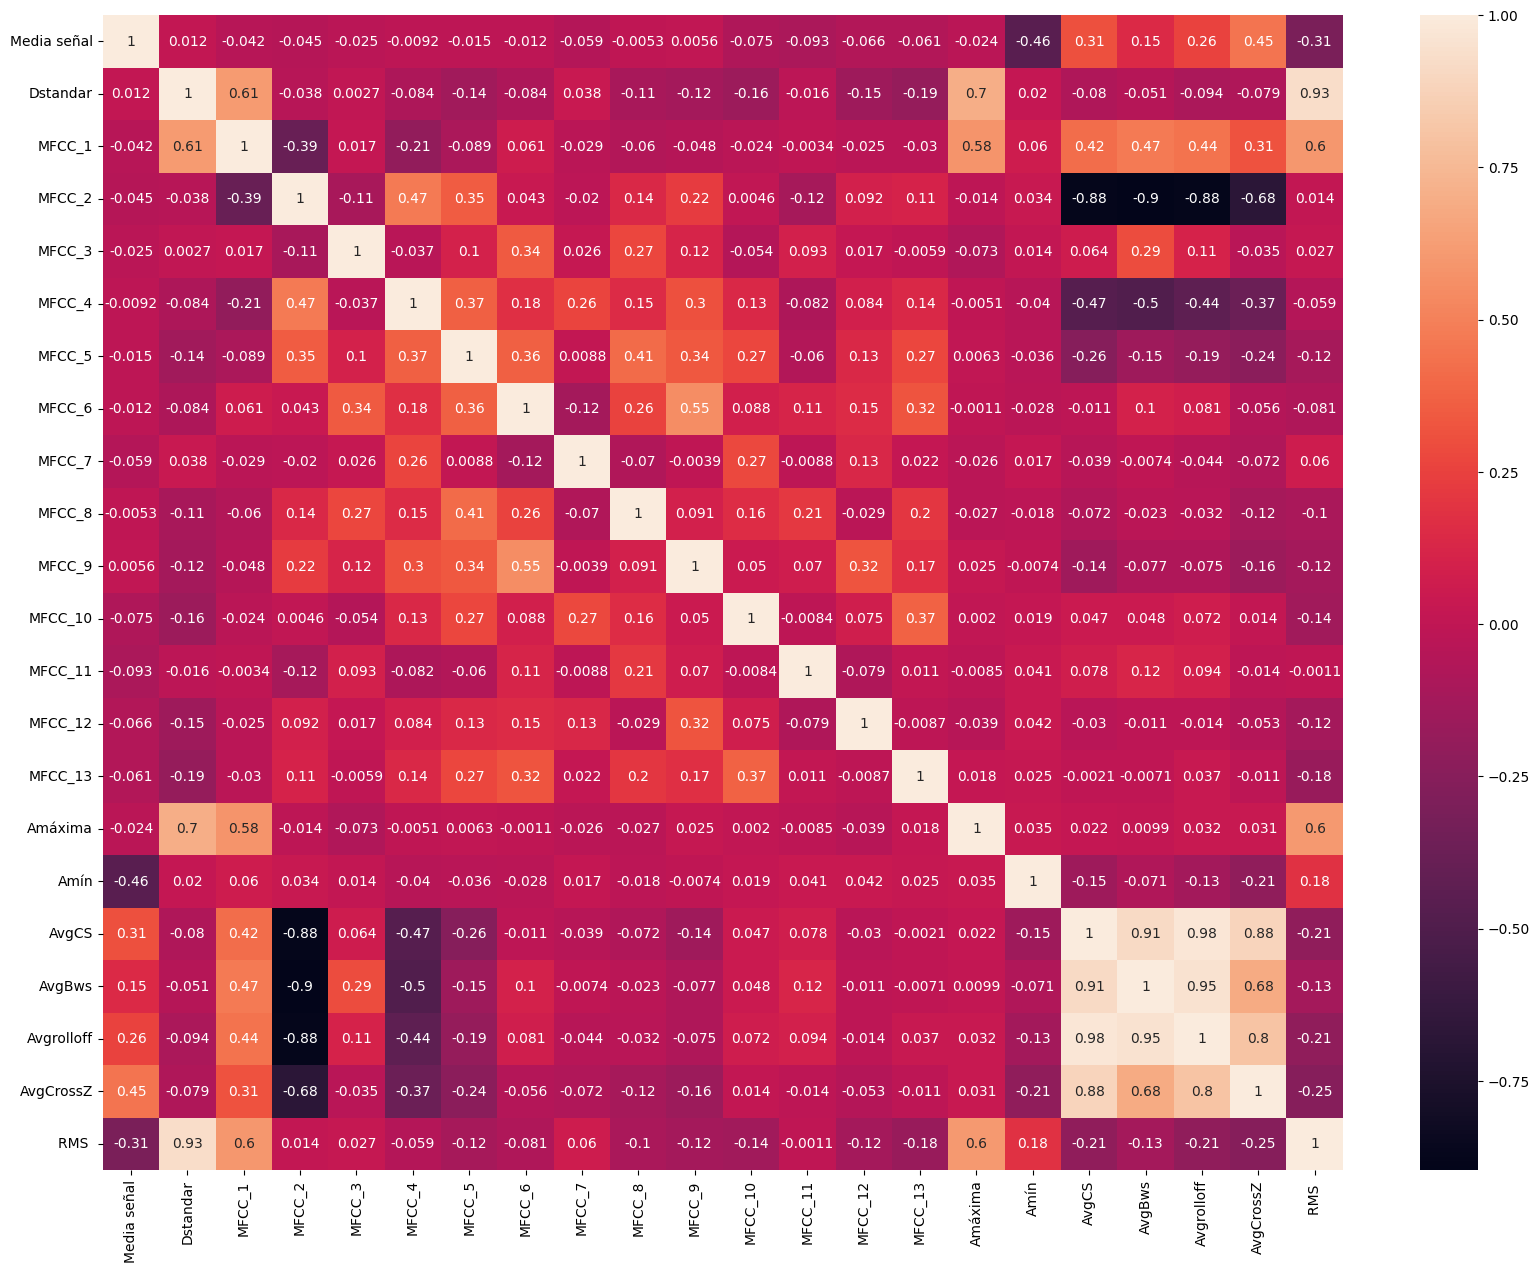

In [15]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



corr_df = df.corr(method="pearson")

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

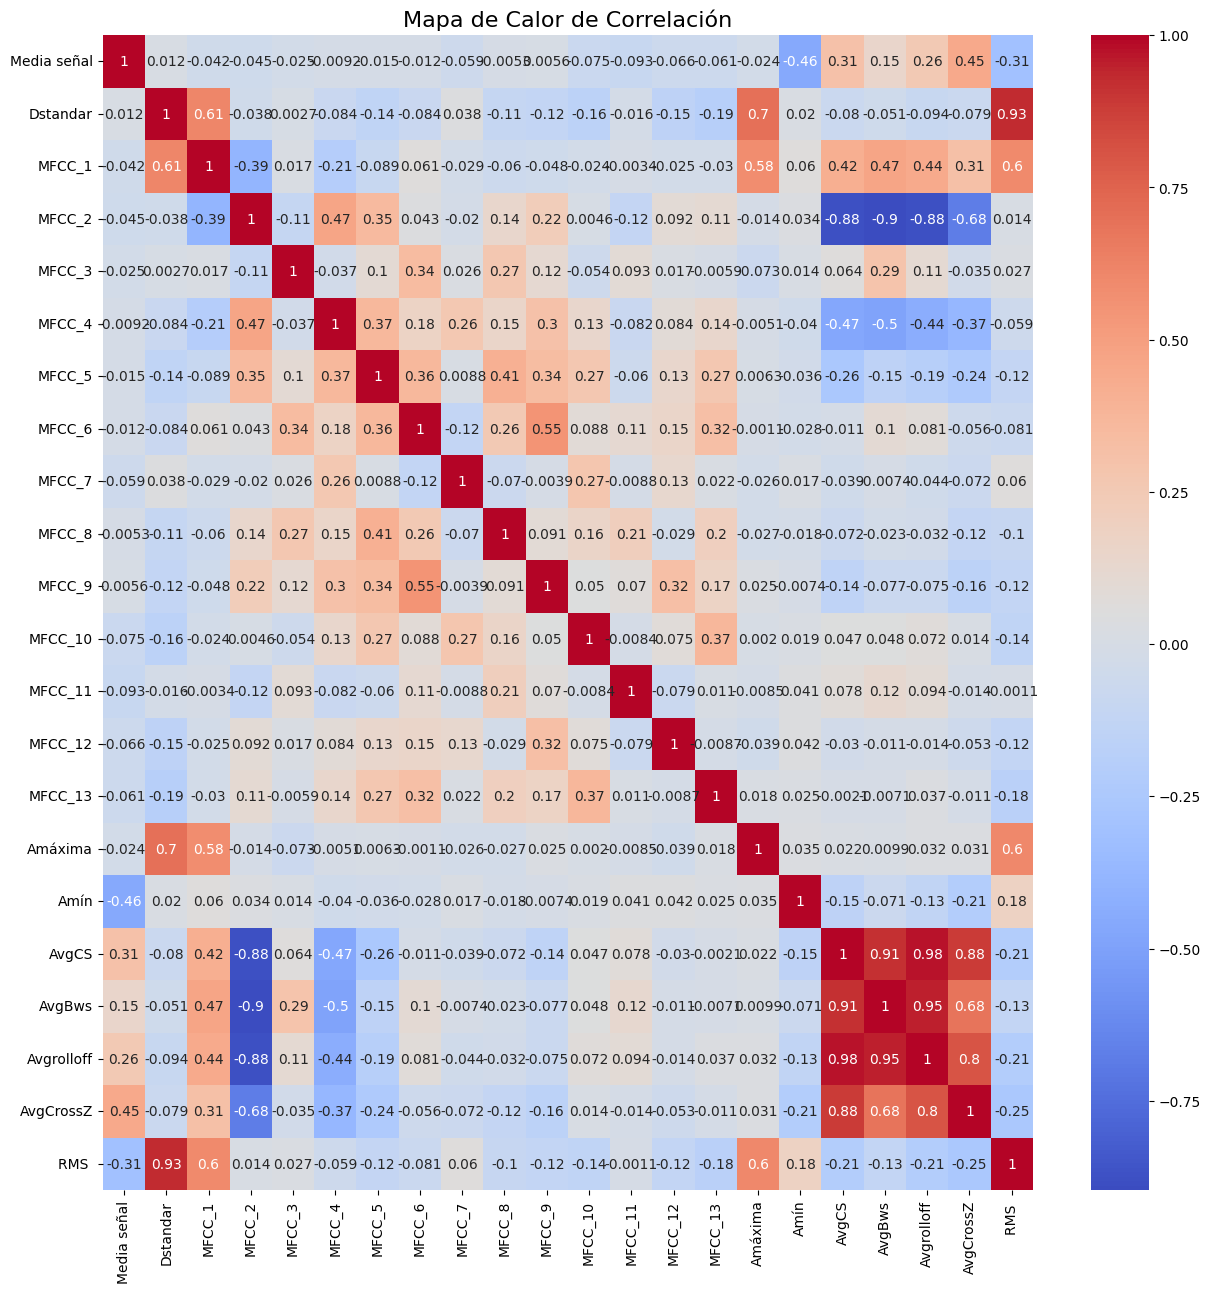

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df y corr_df

# Crear una figura y ejes más grandes
fig, ax = plt.subplots(figsize=(15, 15))

# Crear el mapa de calor
sns.heatmap(corr_df, cmap='coolwarm', annot=True, ax=ax)

# Establecer el título
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Mostrar el mapa de calor
plt.show()

In [17]:
df['Clase'] = df['Clase'].map({'sick': 1, 'sano': 0})

In [18]:
#Balancear datos


In [19]:
df = df.drop('Ruta', axis=1)

X = np.array(df.drop(['Clase'],1))
y = np.array(df['Clase'])
X.shape
df

<ipython-input-19-4b67d6dff44b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Clase'],1))


,Media señal,Dstandar,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_12,MFCC_13,Amáxima,Amín,AvgCS,AvgBws,Avgrolloff,AvgCrossZ,RMS,Clase
0,0.000507,0.113010,-335.460968,90.559555,30.698204,34.027252,10.324809,-1.605530,6.281755,10.063773,...,-5.504457,-7.531395,0.483933,1.432927e-06,1584.164883,1936.438778,2741.204364,0.062995,0.094569,1
1,-0.000026,0.146148,-252.334259,100.314728,15.436992,33.810928,3.361111,-2.840305,0.123441,4.863464,...,-4.730632,-8.819196,0.813208,0.000000e+00,1640.541165,2085.934244,3332.502441,0.049756,0.125139,1
2,0.000154,0.122225,-302.128937,97.595055,26.603548,20.792177,8.289983,-19.893370,2.666850,-11.971066,...,-6.405726,-15.411384,0.736654,1.152846e-06,1757.702273,2289.955499,3196.843262,0.059733,0.102262,1
3,-0.000111,0.091469,-298.022888,102.807350,33.557652,29.289207,3.839974,-14.800287,-9.303822,6.764772,...,-5.740067,-7.074678,0.532929,2.603992e-07,1839.989532,2222.480573,3487.428912,0.076804,0.074492,1
4,0.000614,0.178174,-276.717987,95.966431,16.797180,32.426895,5.460469,-14.558228,0.648947,6.209881,...,-4.830565,-11.588970,0.873630,1.083681e-06,1625.625804,1973.739744,2994.980315,0.062381,0.141706,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,-0.000159,0.094069,-284.316193,79.033096,24.230682,33.330681,16.543144,-0.144021,-5.508734,4.956317,...,-3.061616,-5.492146,0.842788,0.000000e+00,2170.649773,2648.077844,4823.001016,0.063312,0.067099,0
2514,0.000322,0.116297,-206.528320,106.611496,21.443638,40.453037,8.335456,-8.586728,-4.647949,1.058527,...,2.818126,-6.567142,0.936262,2.731686e-07,1836.547840,2249.662272,3753.139426,0.074492,0.101053,0
2515,-0.000115,0.104345,-265.965698,93.998299,30.081154,32.448971,12.935879,1.060116,4.988340,8.228955,...,-1.038174,-9.955409,0.846868,0.000000e+00,2057.105581,2492.249853,4262.447481,0.070676,0.081410,0
2516,-0.000099,0.094901,-284.963531,88.529770,24.216827,30.196507,10.512567,-2.964409,-3.335695,4.873586,...,2.513289,-9.340541,0.581041,0.000000e+00,2157.395432,2406.276033,4273.273058,0.087996,0.075918,0


In [20]:
# Cardinalidad de las variables categóricas
cardinalidad_categoricas = df['Clase'].nunique()
print(f"Cardinalidad de la variable categórica 'Clase': {cardinalidad_categoricas}")

Cardinalidad de la variable categórica 'Clase': 2


In [21]:
#df = df.drop('Ruta', axis=1)

#X = np.array(df.drop(['Clase'],1))
#y = np.array(df['Clase'])
#X.shape

In [22]:
# Verificar si hay algún valor nulo en el DataFrame
hay_nulos = df.isnull().any().any()

# Imprimir el resultado
if hay_nulos:
    print("El DataFrame tiene valores nulos.")
else:
    print("El DataFrame no tiene valores nulos.")

El DataFrame no tiene valores nulos.


In [23]:
# Verificar desequilibrio en las clases
desequilibrio_clases = df['Clase'].value_counts()
print("Distribución de clases:")
print(desequilibrio_clases)
# 1= enfermo
# 2= sano

Distribución de clases:
0    1656
1     862
Name: Clase, dtype: int64


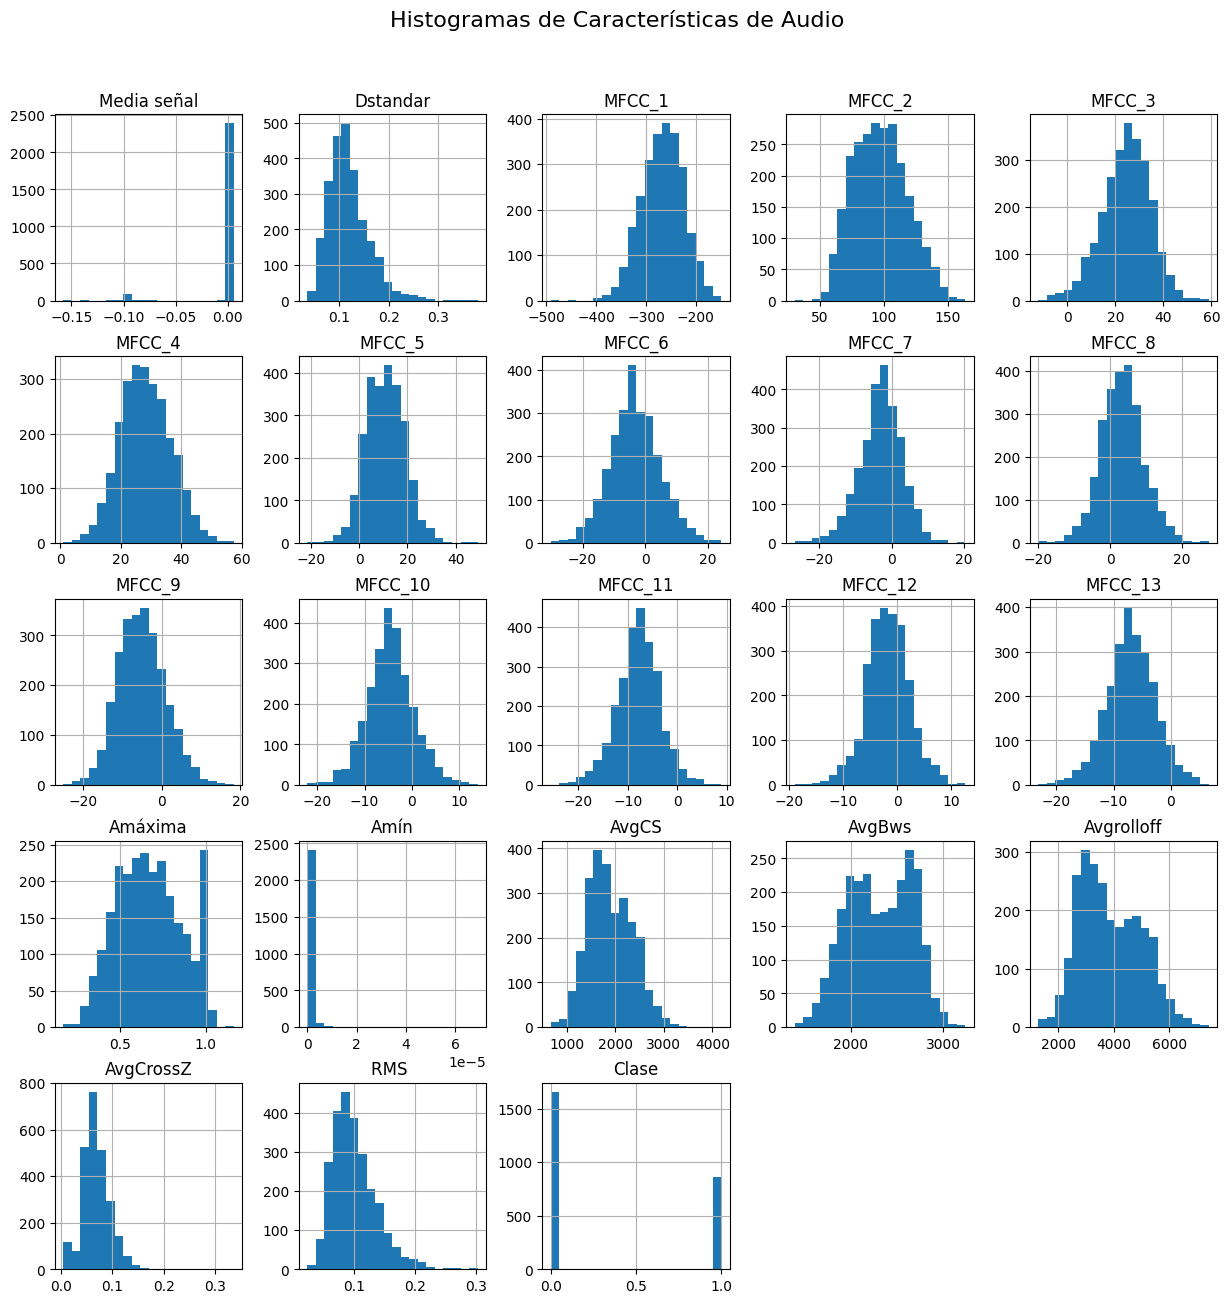

In [24]:
# Visualizar histogramas
df.hist(bins=20, figsize=(15, 15))
plt.suptitle('Histogramas de Características de Audio', y=0.95, fontsize=16)
plt.show()

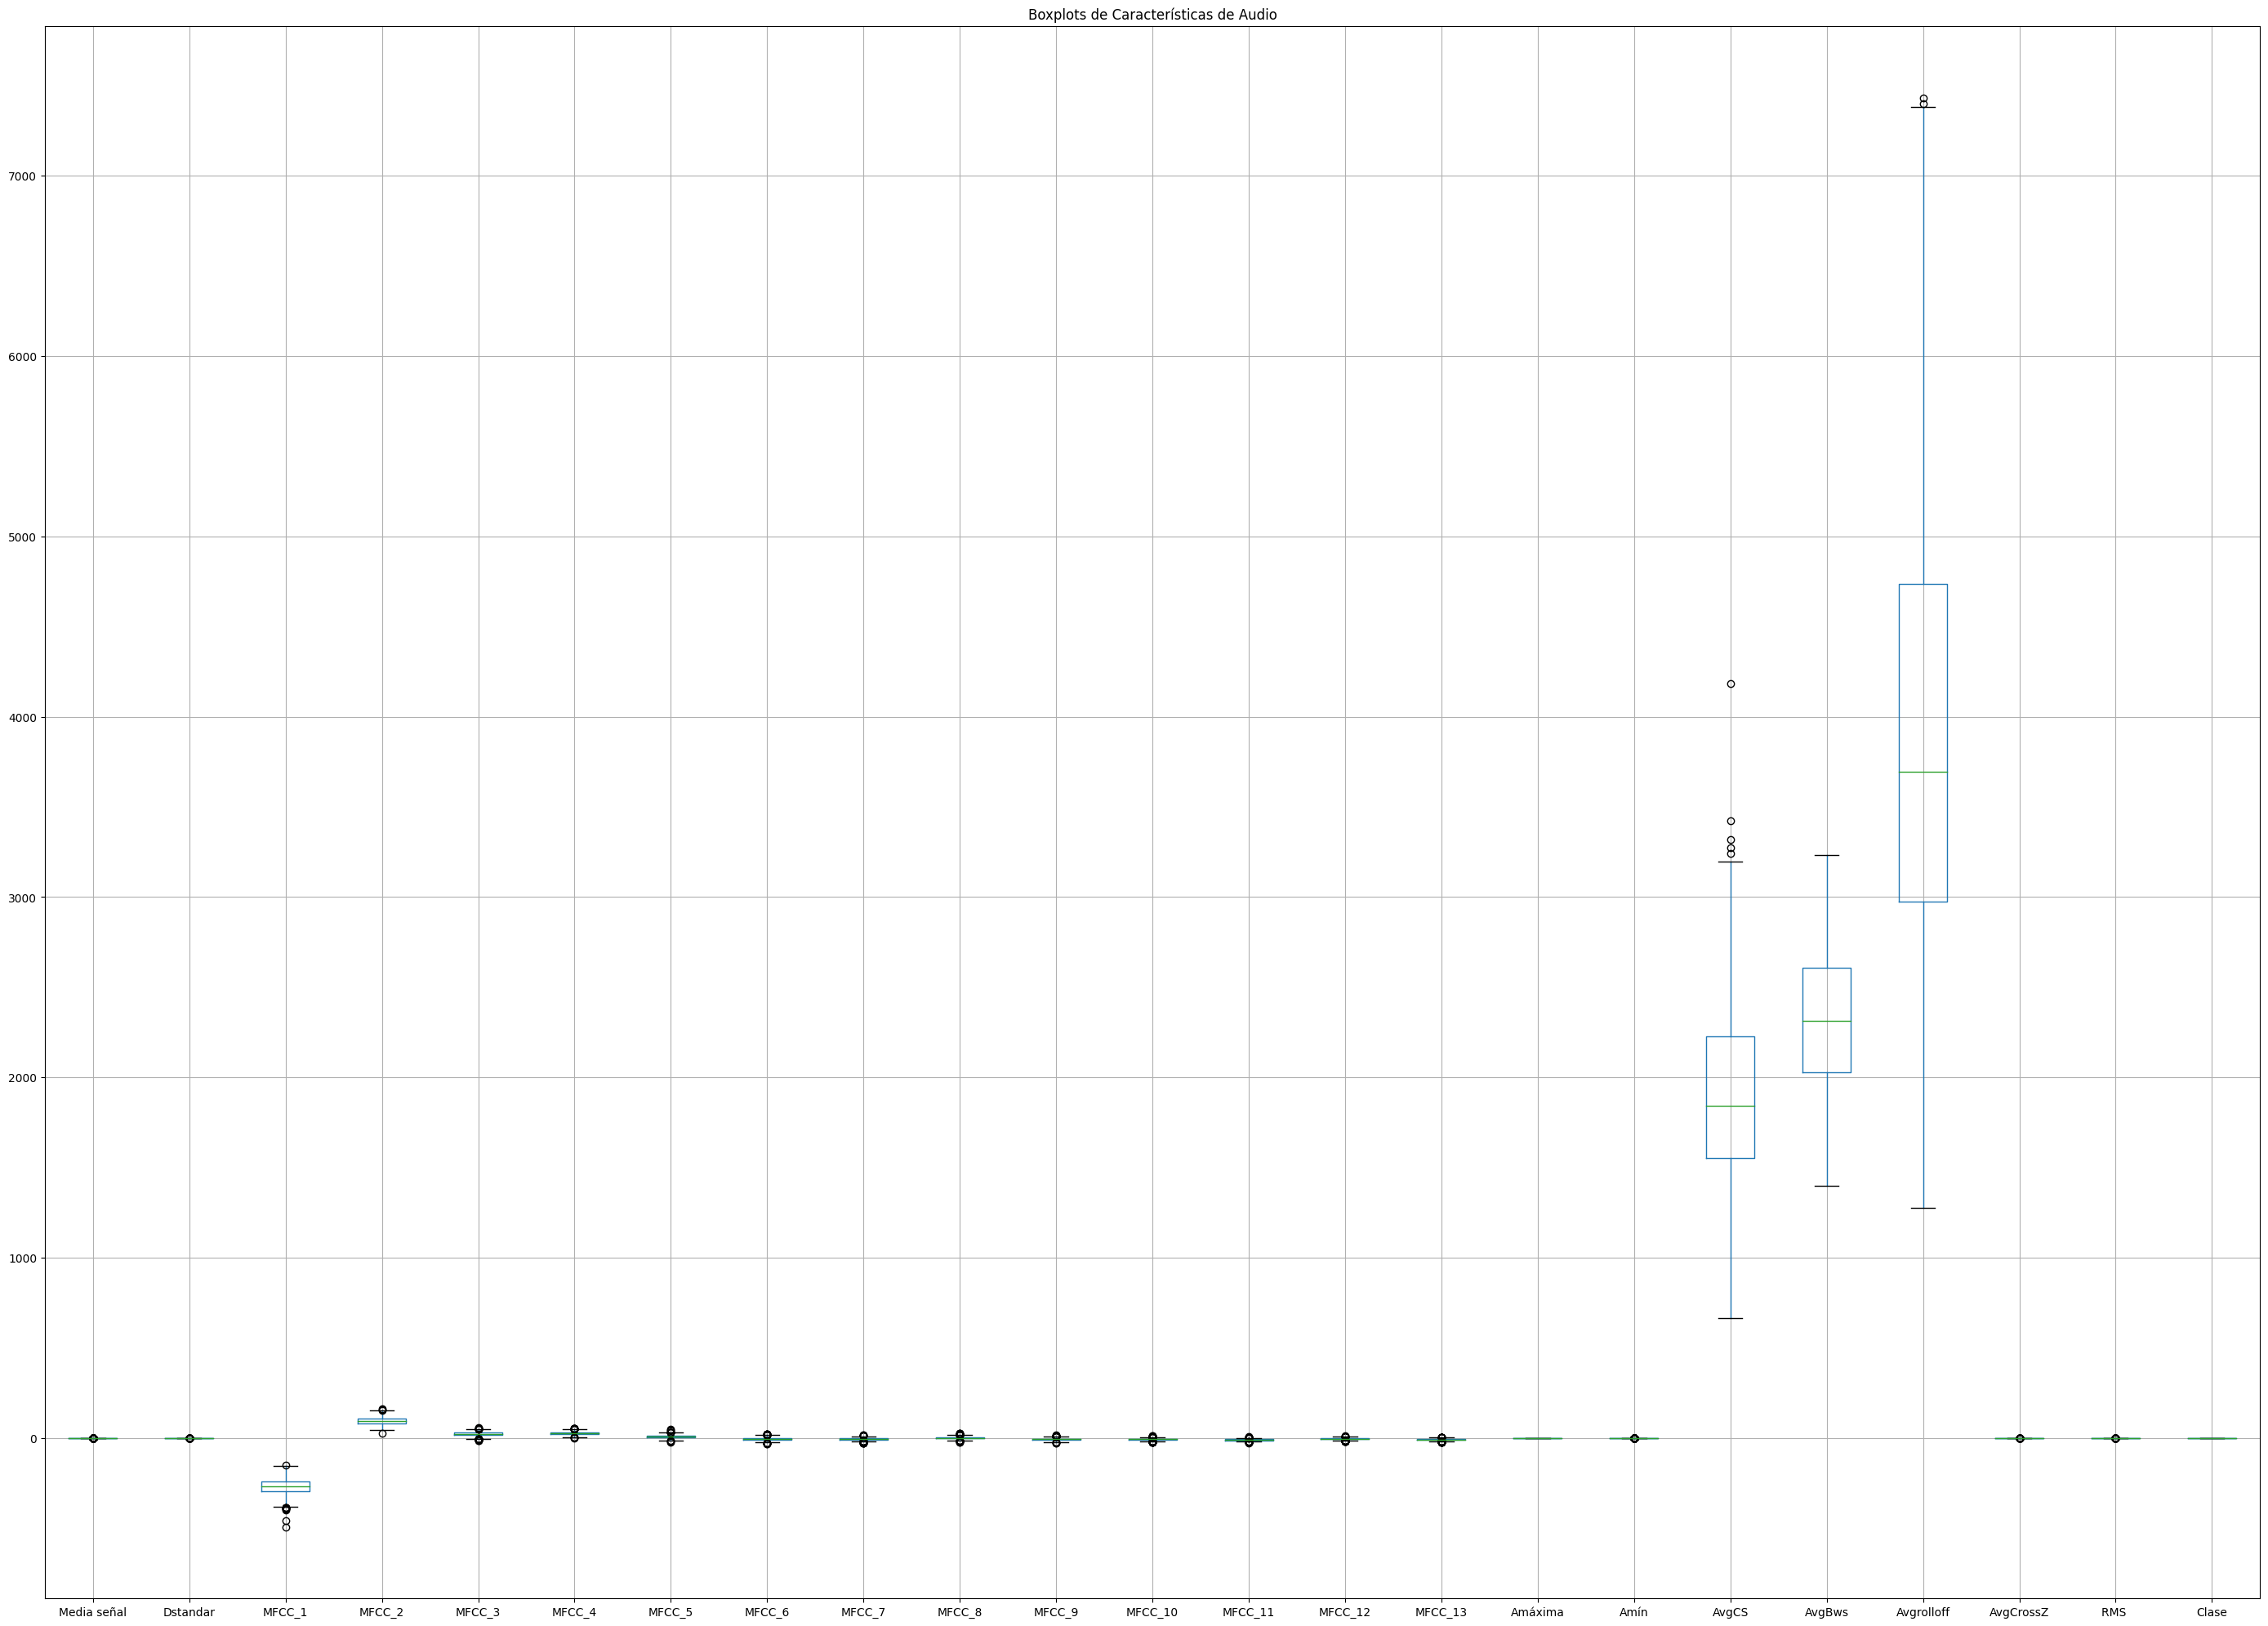

In [25]:
# Visualizar boxplots para identificar valores atípicos
df.boxplot(figsize=(35, 25))
plt.title('Boxplots de Características de Audio')
plt.show()

In [26]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb

model = linear_model.LogisticRegression()
model.fit(X,y)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 0 0 0]


In [28]:
model.score(X,y)

0.716441620333598

In [29]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [30]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=8, random_state=seed,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.707078 (0.025573)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [32]:
#directorio_audio="/content/drive/MyDrive/PROYECTO_FINAL/personas_enfermas_hombre_mujeres_test"
##X_new = nuevos_datos(directorio_audio)
#model.predict(X_new)

<ipython-input-39-9d36ef37954a>:141: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Clase'],1))


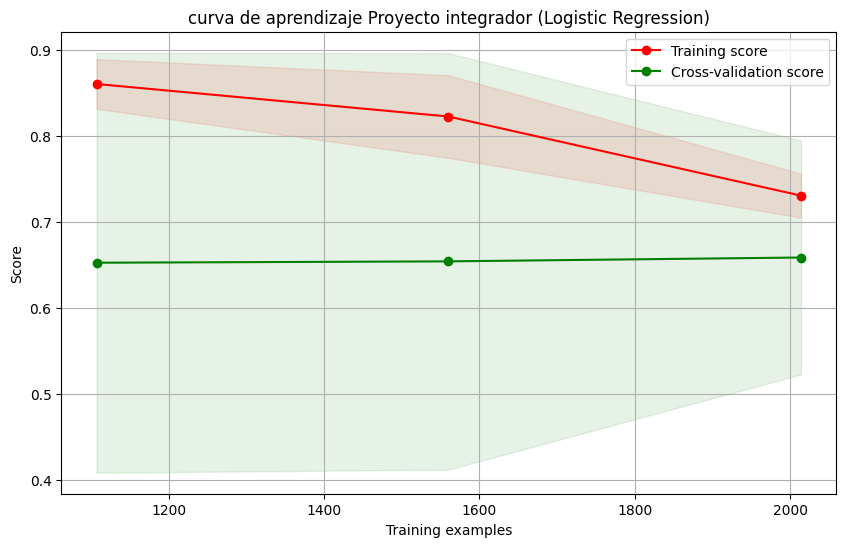

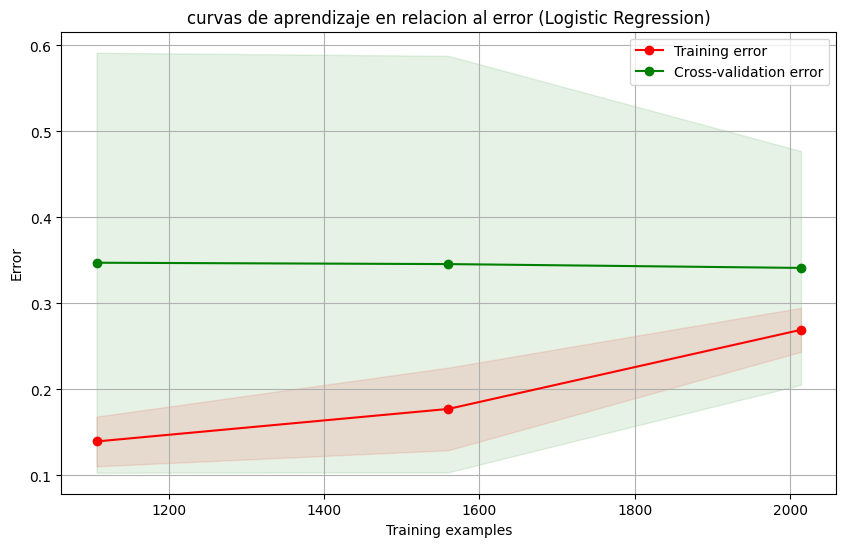

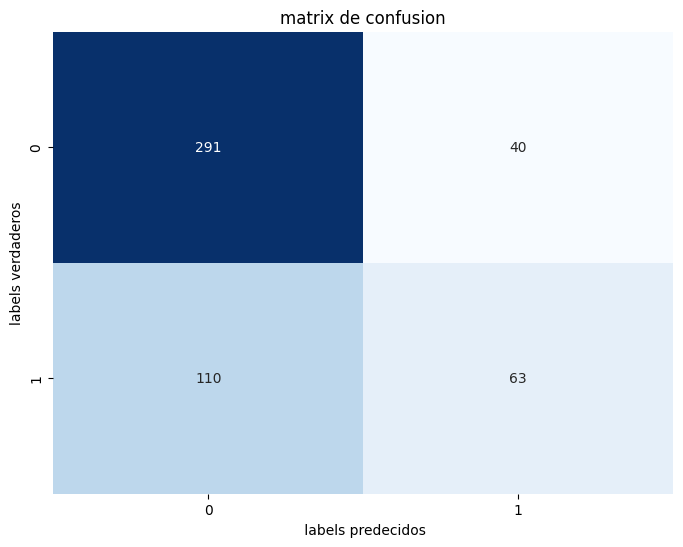

Training score: 0.7204568023833168
Test score: 0.7023809523809523
recall_score: 0.7023809523809523
f1_score: 0.6788698254307663


In [39]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import learning_curve

def plot_learning_curve_with_error(estimator, title, X, y, ylim=None, cv=None,
                                   n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para evaluar el rendimiento del modelo en relación al error.

    Args:
    estimator : Objeto estimador.
    title : Título del gráfico.
    X : Features del dataset.
    y : Variable objetivo del dataset.
    ylim : Tuple (ymin, ymax) para fijar límites en el eje y.
    cv : Estrategia de validación cruzada.
    n_jobs : Número de trabajos a ejecutar en paralelo (por defecto=None).
    train_sizes : Valores de tamaño de entrenamiento para los cuales se generan las curvas de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1 - np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1 - np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    return plt


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para evaluar el rendimiento del modelo.

    Args:
    estimator : Objeto estimador.
    title : Título del gráfico.
    X : Features del dataset.
    y : Variable objetivo del dataset.
    ylim : Tuple (ymin, ymax) para fijar límites en el eje y.
    cv : Estrategia de validación cruzada.
    n_jobs : Número de trabajos a ejecutar en paralelo (por defecto=None).
    train_sizes : Valores de tamaño de entrenamiento para los cuales se generan las curvas de aprendizaje.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def evaluate_logistic_regression(X, y, test_size=0.2, random_state=None, penalty='l2', C=1.0):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inicializar y entrenar el modelo de regresión logística
    model = LogisticRegression(penalty=penalty, C=C, max_iter=1000)
    model.fit(X_train, y_train)

    # Evaluar el rendimiento en el conjunto de entrenamiento y prueba
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Obtener curvas de aprendizaje
    title = "curva de aprendizaje Proyecto integrador (Logistic Regression)"
    cv = 5
    plot_learning_curve(model, title, X, y, cv=cv, n_jobs=-1)
    plt.show()

     # Obtener curvas de aprendizaje con error
    title = "curvas de aprendizaje en relacion al error (Logistic Regression)"
    cv = 5
    plot_learning_curve_with_error(model, title, X, y, cv=cv, n_jobs=-1)
    plt.show()

    # Predecir las clases en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel(" labels predecidos")
    plt.ylabel("labels verdaderos")
    plt.title("matrix de confusion")
    plt.show()

    print("Training score:", train_score)
    print("Test score:", test_score)


    print("recall_score:",recall_score(y_test, y_pred, average='weighted'))
    print("f1_score:",f1_score(y_test, y_pred, average='weighted'))

# Ejemplo de uso
X = np.array(df.drop(['Clase'],1))
y = np.array(df['Clase'])

evaluate_logistic_regression(X, y, test_size=0.2, random_state=42, penalty='l2', C=1.0)

In [40]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
predictions = model.predict(X_validation)

#print(recall_score(y_test, y_pred, average='weighted'))  # Calcular el recall promedio ponderado
#print( f1_score(y_test, y_pred, average='weighted'))  # Calcular el F1-score promedio ponderado
#print(accuracy_score(Y_validation, predictions))

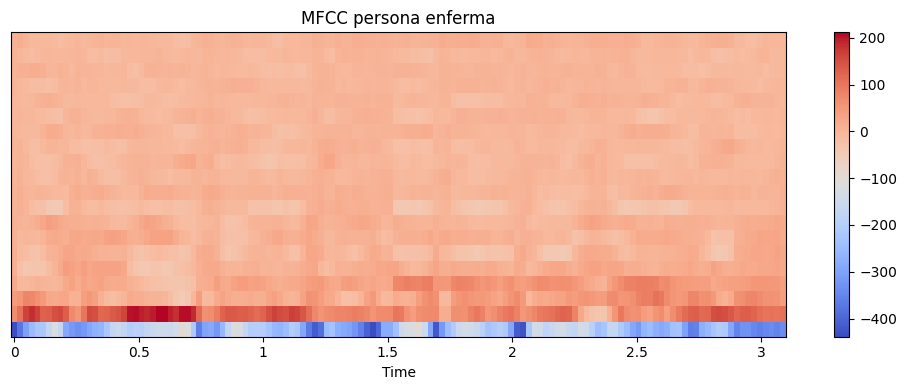

In [41]:
# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/PROYECTO_FINAL/Frases_enfermos_HM_duplicado/export/101-phrase.wav'
y, sr = librosa.load(audio_path)

# Calcular los MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Graficar los MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC persona enferma')
plt.tight_layout()
plt.show()

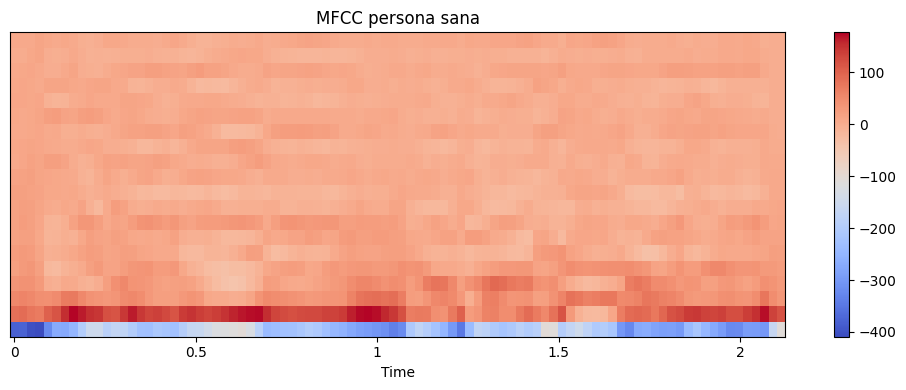

In [35]:
# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/PROYECTO_FINAL/Frases_sanos_hm/export/10-phrase.wav'
y, sr = librosa.load(audio_path)

# Calcular los MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Graficar los MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC persona sana')
plt.tight_layout()
plt.show()